In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
cityDF = pd.read_csv(city_data_to_load)
rideDF = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
DF = rideDF.merge(cityDF, how = "outer", on = "city")
# Display the data table for preview
DF.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


In [2]:
# Set colors to variables
# Need these colors according to readme
# Got hex values from web
# Gold
cgold = "#ffd700"
# light sky blue
clsb = "#87cefa"
# light coral
clcoral = "#f08080"

## Bubble Plot of Ride Sharing Data

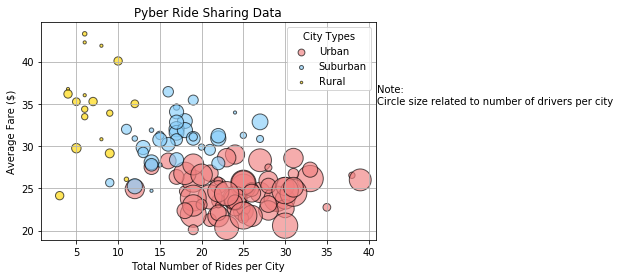

In [3]:
# Obtain the x and y coordinates for each of the three city types
# x is total rides per city, y is average fare per city
# collect total number of drivers per city (size____)
# split into cities first, then get Series
urbanDF = DF[DF["type"] == "Urban"]
suburbanDF= DF[DF["type"] == "Suburban"]
ruralDF = DF[DF["type"] == "Rural"]

urbanGrp = urbanDF.groupby("city")
yUrban = urbanGrp.mean()["fare"]
xUrban = urbanGrp.count()["ride_id"]
sizeUrban = urbanGrp["driver_count"].mean()
sizeUrban = np.array(sizeUrban) * 10

suburbanGrp = suburbanDF.groupby("city")
ySuburban = suburbanGrp.mean()["fare"]
xSuburban = suburbanGrp.count()["ride_id"]
sizeSuburban = suburbanGrp["driver_count"].mean()
sizeSuburban = np.array(sizeSuburban) * 10

ruralGrp = ruralDF.groupby("city")
yRural = ruralGrp.mean()["fare"]
xRural = ruralGrp.count()["ride_id"]
sizeRural = ruralGrp["driver_count"].mean()
sizeRural = np.array(sizeRural) * 10

# Build the scatter plots for each city types
plt.scatter(xUrban, yUrban, color = clcoral, s = sizeUrban, edgecolors = "black", alpha = 0.65)
plt.scatter(xSuburban, ySuburban, color = clsb, s = sizeSuburban, edgecolors = "black", alpha = 0.65)
plt.scatter(xRural, yRural, color = cgold, s = sizeRural, edgecolors = "black", alpha = 0.65)
#plt.show()

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Total Number of Rides per City")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data")
#plt.show()

# Create a legend
plt.legend(["Urban", "Suburban", "Rural"], loc = "best", markerscale = 0.35, title = "City Types")
#plt.show()

# Incorporate a text label regarding circle size
plt.text(41, 35, "Note:\nCircle size related to number of drivers per city")
#plt.show()

# Save Figure
plt.savefig("PyberBubble.png", bbox_inches = "tight")

In [4]:
# Show plot
# plot is above, probably due to the ""%matplotlib inline" argument in cell 1
plt.show()

## Total Fares by City Type

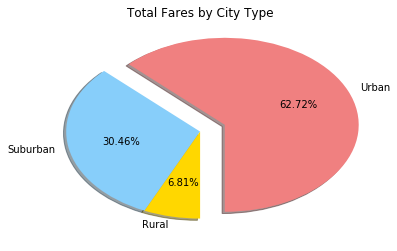

In [5]:
# Calculate Type Percents
totalCities = DF["fare"].sum()
totalUrban = urbanDF["fare"].sum()
totalSuburban = suburbanDF["fare"].sum()
totalRural = ruralDF["fare"].sum()

pData = [totalUrban, totalSuburban, totalRural]
pData = np.array(pData)
pData = pData / totalCities
pLabels = ["Urban", "Suburban", "Rural"]
# Build Pie Chart
plt.pie(pData, labels = pLabels, shadow = True, explode = (0.2, 0, 0), colors = (clcoral, clsb, cgold), startangle = -90, autopct = "%.2f%%")
plt.title("Total Fares by City Type")
#plt.show()

# Save Figure
plt.savefig("PyberPieFare.png")


In [6]:
# Show Figure
# Same thing as above 
plt.show()

## Total Rides by City Type

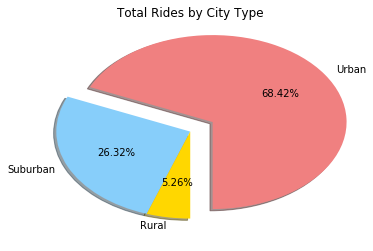

In [7]:
# Calculate Ride Percents
# Note I can reuse a lot of the code above, and I will do so
totalCities = DF["ride_id"].count()
totalUrban = urbanDF["ride_id"].count()
totalSuburban = suburbanDF["ride_id"].count()
totalRural = ruralDF["ride_id"].count()

pData = [totalUrban, totalSuburban, totalRural]
pData = np.array(pData)
pData = pData / totalCities
pLabels = ["Urban", "Suburban", "Rural"]

# Build Pie Chart
plt.pie(pData, labels = pLabels, shadow = True, explode = (0.2, 0, 0), colors = (clcoral, clsb, cgold), startangle = -90, autopct = "%.2f%%")

# Save Figure
plt.title("Total Rides by City Type")
plt.savefig("PyberPieRides.png")


In [8]:
# Show Figure
plt.show()

## Total Drivers by City Type

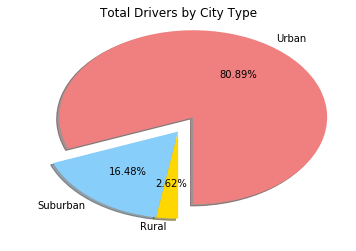

In [9]:
# Calculate Driver Percents
# Once again reusing code above
# I probably should have made a function but I'll just keep it like this since this is the last pie chart anyway
totalUrban = urbanGrp["driver_count"].mean()
totalSuburban = suburbanGrp["driver_count"].mean()
totalRural = ruralGrp["driver_count"].mean()
totalUrban = totalUrban.sum()
totalSuburban = totalSuburban.sum()
totalRural = totalRural.sum()

pData = [totalUrban, totalSuburban, totalRural]
pData = np.array(pData)
pLabels = ["Urban", "Suburban", "Rural"]

# Build Pie Charts
plt.pie(pData, labels = pLabels, shadow = True, explode = (0.2, 0, 0), colors = (clcoral, clsb, cgold), startangle = -90, autopct = "%.2f%%")

# Save Figure
plt.title("Total Drivers by City Type")
plt.savefig("PyberPieDrivers.png")

In [10]:
# Show Figure
plt.show()